# **Часть 3. Задача кластеризации**

Датасет: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Для представленного датасета необходимо решить задачу кластеризации методом k-средних. При решении задачи необходимо ответить на следующие вопросы:

1. Как выбор начальных центров кластеров влияет на результат кластеризации?

2. Какую метрику выбрать для оценки качества кластеризации?

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [183]:
df = pd.read_csv('CC GENERAL.csv')

# **Обработка данных**

In [184]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [186]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [187]:
df.drop('CUST_ID', axis = 1, inplace = True)

In [188]:
df.fillna(df.median(), inplace = True)

<Axes: >

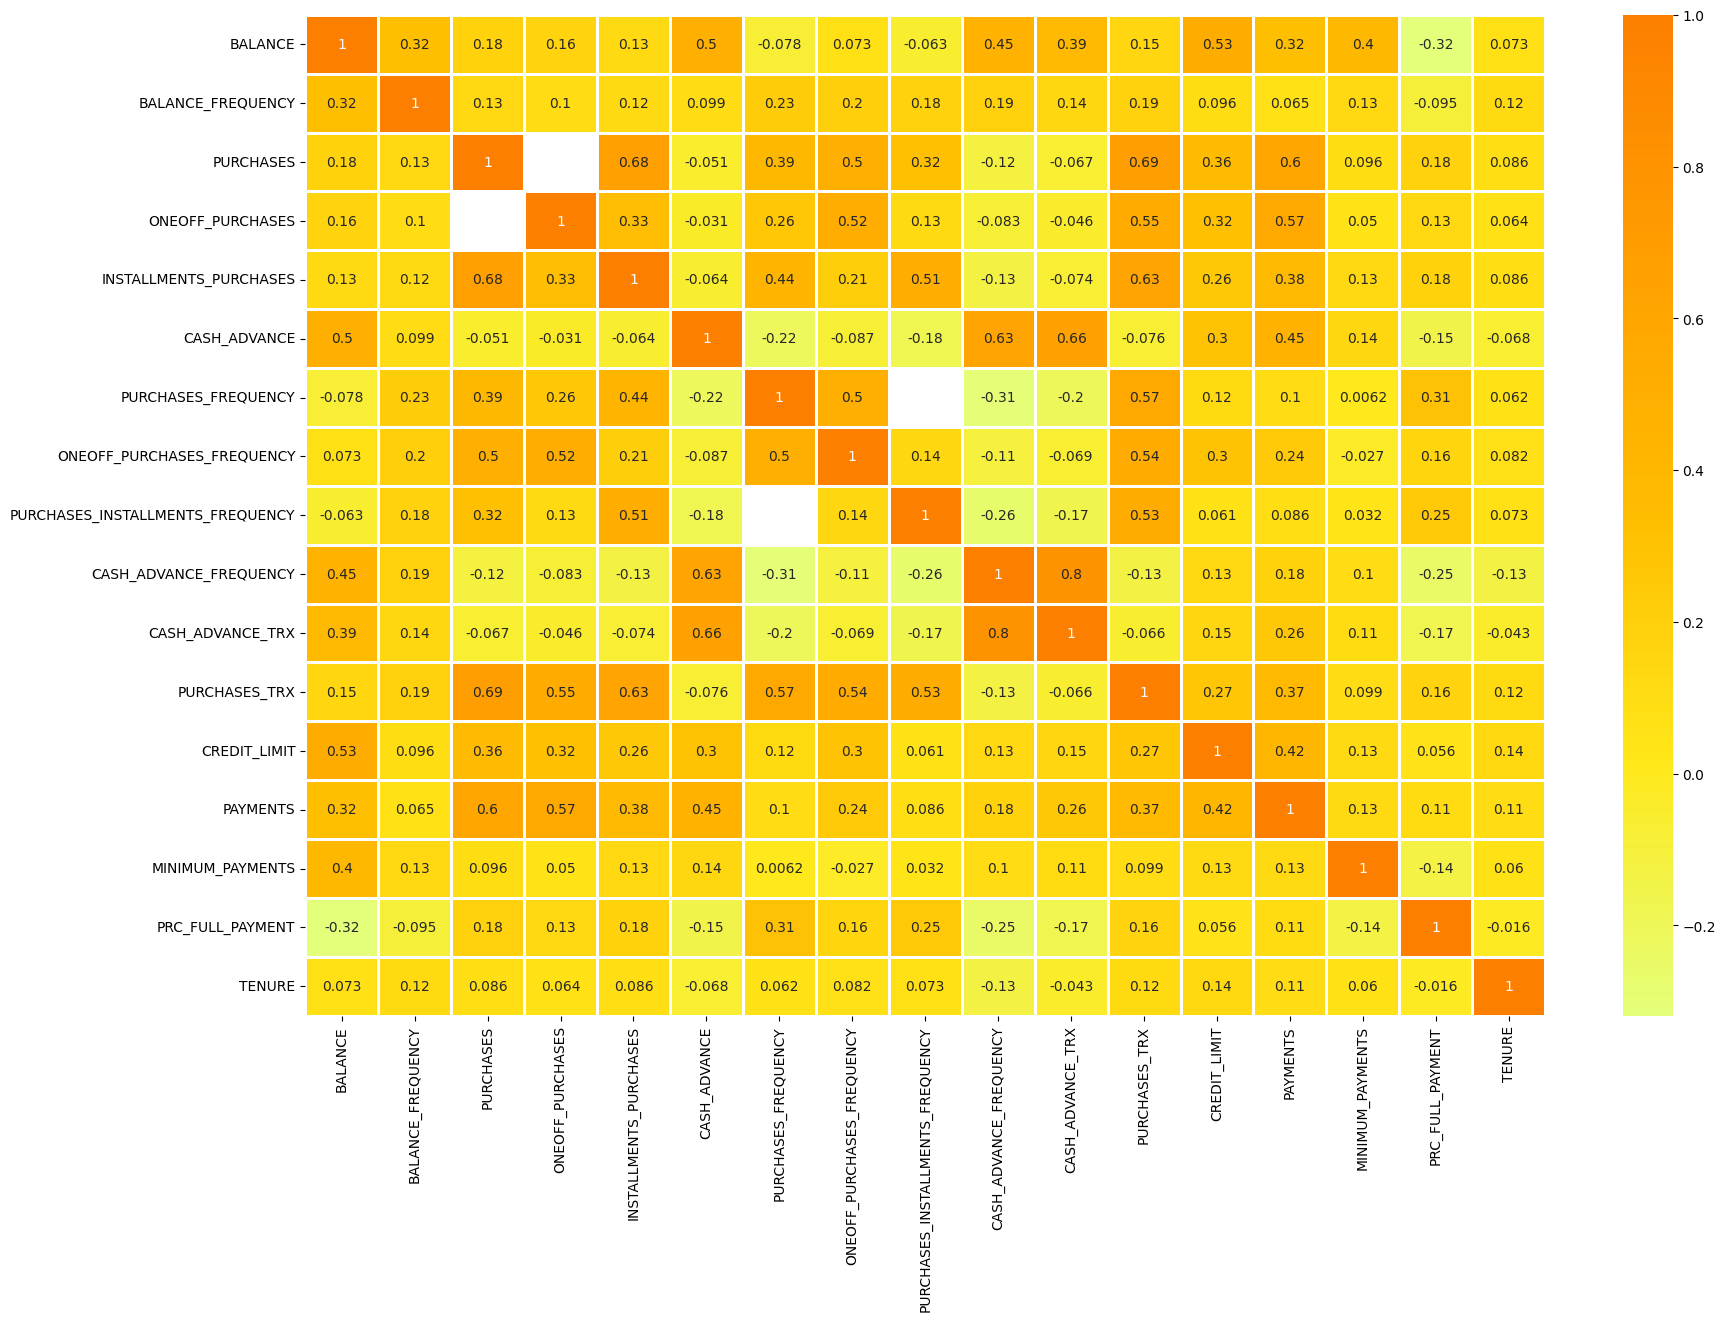

In [189]:
correlation = df.corr()
mask = (correlation.abs() > 0.8) & (correlation != 1.0)
plt.figure(figsize=(20,13))
sns.heatmap(data=correlation, cmap='Wistia', lw=1, annot=True, mask=mask)

In [190]:
df = df.drop(["ONEOFF_PURCHASES", "PURCHASES_INSTALLMENTS_FREQUENCY"], axis = 1)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BALANCE                     8950 non-null   float64
 1   BALANCE_FREQUENCY           8950 non-null   float64
 2   PURCHASES                   8950 non-null   float64
 3   INSTALLMENTS_PURCHASES      8950 non-null   float64
 4   CASH_ADVANCE                8950 non-null   float64
 5   PURCHASES_FREQUENCY         8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY  8950 non-null   float64
 7   CASH_ADVANCE_FREQUENCY      8950 non-null   float64
 8   CASH_ADVANCE_TRX            8950 non-null   int64  
 9   PURCHASES_TRX               8950 non-null   int64  
 10  CREDIT_LIMIT                8950 non-null   float64
 11  PAYMENTS                    8950 non-null   float64
 12  MINIMUM_PAYMENTS            8950 non-null   float64
 13  PRC_FULL_PAYMENT            8950 

In [192]:
X_scaler = StandardScaler()
X = X_scaler.fit_transform(df)

# **Метод k-средних**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

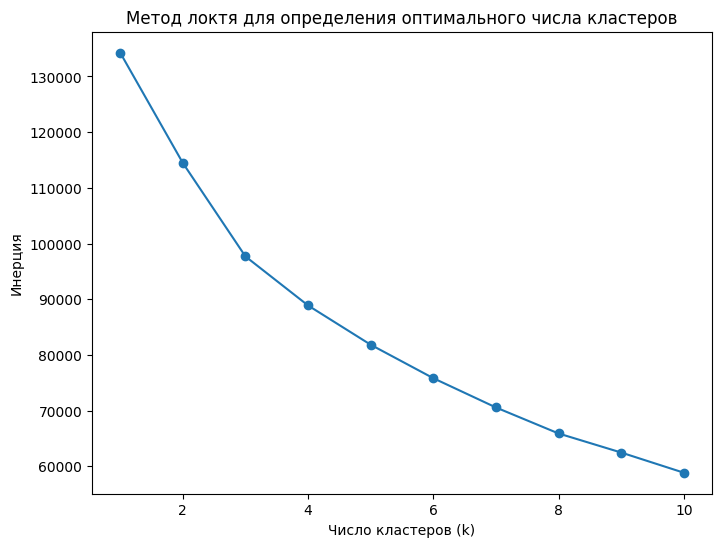

In [193]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Инерция')
plt.show()

In [201]:
stepOfInertia = [(inertia[i] - inertia[i + 1]) /(inertia[0] - inertia[1]) for i in range(len(inertia) - 1)]
stepOfInertia

[1.0,
 0.8477431396244395,
 0.4448043403319282,
 0.3561536988116507,
 0.3035223002031642,
 0.2654184259951345,
 0.23588037042868634,
 0.1729300062673151,
 0.1829614466642371]

Основываясь на графике метода локтя, было определено, что оптимальное количество кластеров равно 3, т.к. на этом значении инерция начинает иметь более пологий характер

In [202]:
kmeans = KMeans(n_clusters=3, random_state=42)
NL = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, NL)
silhouette_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2639390443145668

In [203]:
df["CLUSTER"] = NL

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [205]:
df.groupby('CLUSTER').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,
0,1972.077941,0.979042,3690.698758,1351.700340,346.269616,0.943017,0.674156,0.052155,1.120828,49.999332,7337.349800,3602.177854,1086.967328,0.297752,11.907877
1,814.641316,0.829945,461.973758,236.582806,363.781662,0.433788,0.104646,0.073937,1.318312,7.847822,3171.947803,896.534498,536.493496,0.147451,11.452497
2,4121.730928,0.962979,466.882777,164.285953,4039.053175,0.263298,0.119456,0.459607,12.995349,6.699668,6889.637572,3178.660725,1822.665570,0.035099,11.384718


In [210]:
y = df["CLUSTER"]
X = df.drop(["CLUSTER"], axis = 1)

In [ ]:
X = StandardScaler().fit_transform(X)
pca= PCA(n_components=2)
X_pca= pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['CLUSTER'] = NL

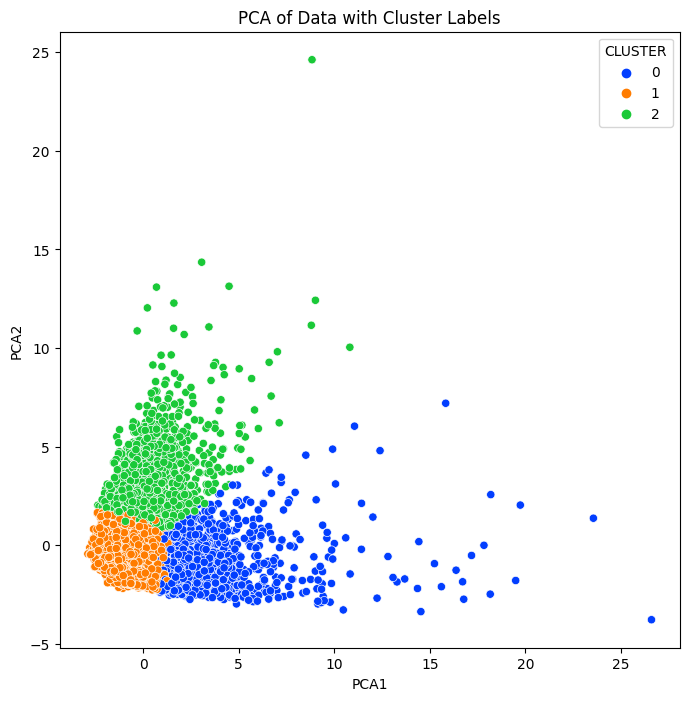

In [217]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='CLUSTER', data=pca_df, palette='bright')
plt.title('PCA of Data with Cluster Labels')
plt.show()

# **Вопросы**
1. Как выбор начальных центров кластеров влияет на результат кластеризации

Выбор начальных центров кластеров является важным аспектом при использовании метода k-средних. Метод является итеративным алгоритмом, который минимизирует сумму квадратов расстояний между точками и центрами кластеров. Важно, чтобы начальные центры были выбраны так, чтобы алгоритм сходился к глобальному минимуму.
Он может застревать в локальных минимумах, и выбор различных начальных центров может привести к различным локальным оптимумам. Это особенно заметно в случае, когда кластеры имеют различные формы или размеры.
Также начальные центры могут оказывать влияние на чувствительность алгоритма к выбросам. Плохой выбор начальных центров может привести к тому, что алгоритм привлекает кластеры к выбросам или формирует кластеры вокруг них

2. Какую метрику выбрать для оценки качества кластеризации?

В нашем случае была выбрана метрика силуэтного коэффициента (silhouette score). Она показывает насколько объекты внутри кластеров похожи друг на друга по сравнению с объектами в других кластерах.

